In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn import preprocessing

import matplotlib.pyplot as plt

import os

from PIL import Image


In [2]:
# Constants
K_MEANS_THRESHOLD = 20
SUPTITLE_FONTSIZE = 26
TITLE_FONTSIZE = 18

In [3]:
# Directories
feed_dataset_dir = '../../feed-datasets' 
images_dir = '../../images/aculei-images'

In [4]:
dd = pd.read_pickle(feed_dataset_dir + '/aculei-numerical.pkl')
dd.head()

temperature  wild boar  porcupine       fox    badger    marten      wolf  \
0         25.0   0.970243   0.011796  0.011460  0.001555  0.001512  0.000991   
1         16.0   0.996869   0.002792  0.000112  0.000078  0.000033  0.000027   
2          9.0   0.084593   0.352572  0.188861  0.205791  0.131927  0.003121   
3         15.0   0.181697   0.263160  0.280894  0.010420  0.045404  0.011294   
4         19.0   0.000118   0.000149  0.942590  0.000321  0.048537  0.007341   

       deer      hare  squirrel  ...  season_winter  day_time_day  \
0  0.000947  0.000824  0.000282  ...              0             0   
1  0.000049  0.000013  0.000010  ...              0             0   
2  0.002608  0.004968  0.008771  ...              0             1   
3  0.020466  0.067673  0.004126  ...              0             1   
4  0.000033  0.000437  0.000366  ...              0             0   

   day_time_night  hunter_camera_1.0  hunter_camera_2.0  hunter_camera_3.0  \
0               1                  1                  0                  0   
1               1                  1                  0                  0   
2               0                  0                  0                  0   
3               0                  0                  0                  0   
4               1                  1                  0                  0   

   hunter_camera_4.0  hunter_camera_5.0  hunter_camera_6.0  hunter_camera_7.0  
0                  0                  0                  0                  0  
1                  0                  0                  0                  0  
2                  0                  0                  1                  0  
3                  0                  0                  1                  0  
4                  0                  0                  0                  0  

[5 rows x 29 columns]

In [5]:
mean_value = dd.temperature.mean()
dd.temperature.fillna(value=mean_value, inplace=True)

In [6]:
x = dd.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dd = pd.DataFrame(x_scaled, columns=dd.columns)

In [7]:
dd.head()

temperature  wild boar  porcupine       fox    badger    marten      wolf  \
0     0.738095   0.970339   0.011797  0.011498  0.001561  0.001526  0.001119   
1     0.523810   0.996969   0.002792  0.000111  0.000077  0.000033  0.000030   
2     0.357143   0.084600   0.352599  0.189490  0.206726  0.133163  0.003526   
3     0.500000   0.181714   0.263180  0.281831  0.010466  0.045829  0.012760   
4     0.595238   0.000117   0.000149  0.945735  0.000321  0.048991  0.008293   

       deer      hare  squirrel  ...  season_winter  day_time_day  \
0  0.000951  0.000833  0.000314  ...            0.0           0.0   
1  0.000049  0.000013  0.000010  ...            0.0           0.0   
2  0.002619  0.005028  0.009804  ...            0.0           1.0   
3  0.020556  0.068491  0.004612  ...            0.0           1.0   
4  0.000033  0.000442  0.000409  ...            0.0           0.0   

   day_time_night  hunter_camera_1.0  hunter_camera_2.0  hunter_camera_3.0  \
0             1.0                1.0                0.0                0.0   
1             1.0                1.0                0.0                0.0   
2             0.0                0.0                0.0                0.0   
3             0.0                0.0                0.0                0.0   
4             1.0                1.0                0.0                0.0   

   hunter_camera_4.0  hunter_camera_5.0  hunter_camera_6.0  hunter_camera_7.0  
0                0.0                0.0                0.0                0.0  
1                0.0                0.0                0.0                0.0  
2                0.0                0.0                1.0                0.0  
3                0.0                0.0                1.0                0.0  
4                0.0                0.0                0.0                0.0  

[5 rows x 29 columns]

### PCA Analysis

Explained Variance Ratio: [1.78217839e-01 8.07103516e-02 6.31919221e-02 5.91074891e-02
 5.25058628e-02 4.79527398e-02 4.42676162e-02 4.12025393e-02
 3.78503921e-02 3.58713374e-02 3.43298764e-02 3.30333411e-02
 3.23169793e-02 3.09541145e-02 2.85764550e-02 2.84296607e-02
 2.77531527e-02 2.50796704e-02 2.39305473e-02 2.00711698e-02
 1.81547996e-02 1.78510025e-02 1.54236491e-02 1.24443488e-02
 9.07327771e-03 1.66188045e-03 3.79853340e-05 6.70024708e-16
 1.85134577e-31]


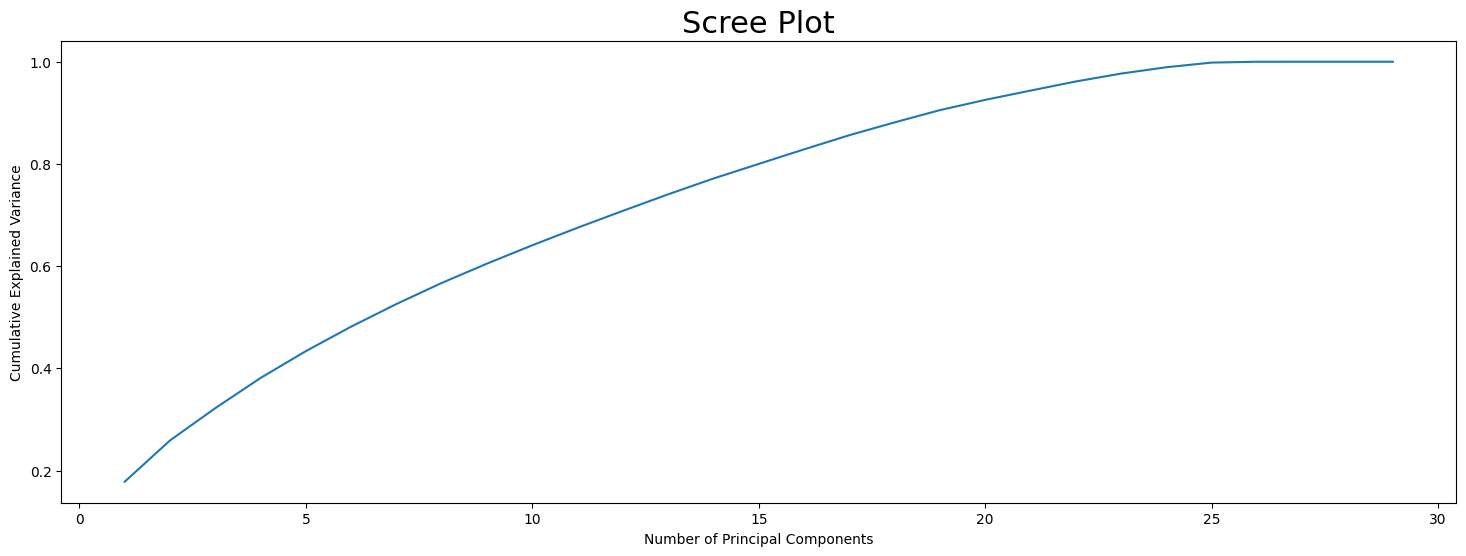

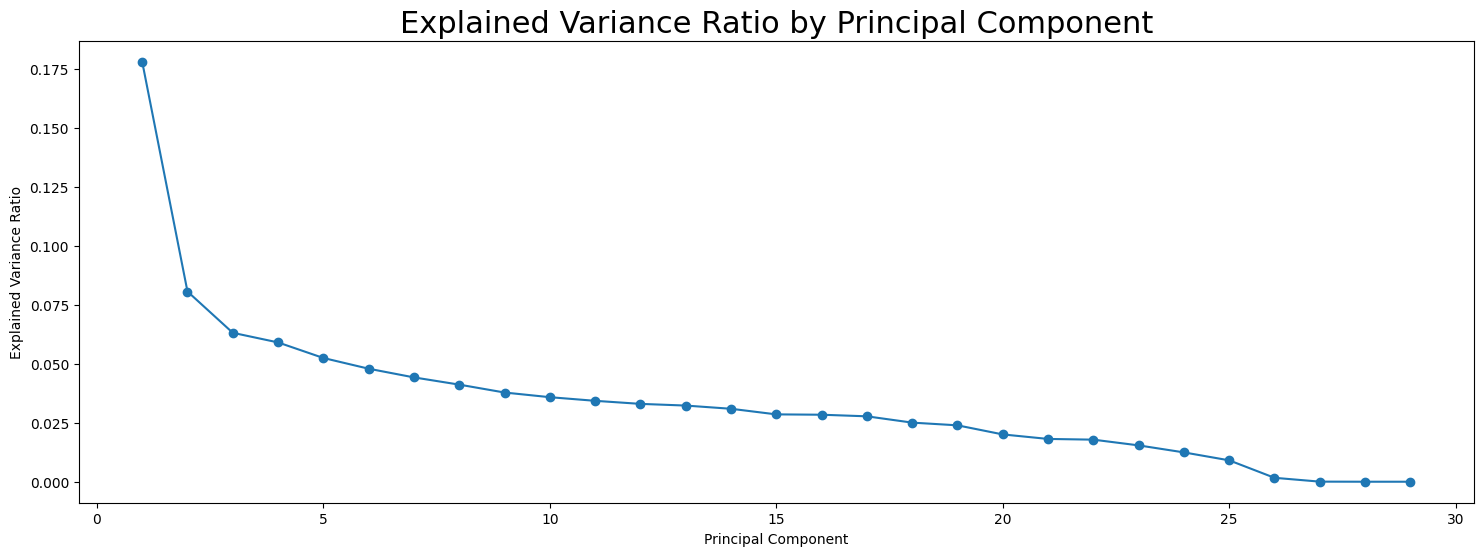

Principal Components:
[[-3.18625885e-01 -3.62978220e-01  8.44722753e-02  1.81677626e-01
   8.90171393e-02  1.52246285e-01  1.31671614e-01  1.43605345e-01
   1.51349225e-01  1.29414151e-01  9.82749102e-02  8.99891620e-02
   1.38864354e-01  7.35564393e-02  5.67237673e-02  9.35632474e-02
   1.07736773e-01  9.22643223e-02 -3.43680847e-01  2.69408020e-01
   2.55737761e-01 -2.55737761e-01 -3.68507259e-01 -2.92178297e-03
   8.23891358e-02  1.67198745e-01  7.78997019e-02  2.05670525e-01
   5.38889081e-02]
 [ 2.07227425e-01 -1.22679083e-01  2.35028835e-02  1.52865596e-01
  -1.11496056e-01  4.92396918e-02  3.16549063e-01  1.68311030e-01
  -1.96463676e-02  1.84306750e-01  1.34002948e-01  2.65239443e-01
  -3.29361067e-01  2.30830214e-01  1.84513160e-01 -1.90214632e-01
   2.65921093e-01  7.84601295e-03  2.36465407e-03 -2.30080396e-01
  -9.63182836e-02  9.63182836e-02 -6.35931182e-02  5.34205885e-02
   3.27101044e-01  8.60241925e-02  6.28495720e-02 -3.90552235e-01
  -4.73200732e-05]
 [ 1.09650195e-0

temperature  wild boar  porcupine       fox    badger    marten      wolf  \
0    -0.318626  -0.362978   0.084472  0.181678  0.089017  0.152246  0.131672   
1     0.207227  -0.122679   0.023503  0.152866 -0.111496  0.049240  0.316549   
2     0.109650   0.096453  -0.341944 -0.042417 -0.237440 -0.331770  0.135897   
3    -0.099793  -0.145240   0.033579  0.116855  0.136754  0.077256  0.112073   
4     0.084350  -0.055978  -0.084549  0.379636 -0.080018  0.122422  0.162409   
5     0.079525   0.130785   0.042208 -0.216968  0.318543  0.225577  0.084434   
6    -0.197608   0.157790  -0.223072 -0.044197  0.018996 -0.157446  0.078516   
7    -0.071419   0.084189   0.202626 -0.207419 -0.144681 -0.096643  0.064177   
8     0.068339  -0.066688  -0.273667  0.001349  0.176271  0.264131 -0.165584   
9    -0.003482  -0.063023   0.439941  0.009069 -0.353146 -0.195039 -0.037434   

       deer      hare  squirrel  ...  season_winter  day_time_day  \
0  0.143605  0.151349  0.129414  ...       0.269408      0.255738   
1  0.168311 -0.019646  0.184307  ...      -0.230080     -0.096318   
2  0.093008  0.049059 -0.074740  ...       0.072410      0.275201   
3 -0.232631  0.026390 -0.095194  ...       0.216629     -0.420105   
4 -0.064018  0.288568  0.202966  ...       0.024703     -0.011378   
5 -0.262447 -0.427954 -0.024499  ...       0.124958      0.233659   
6  0.000763 -0.040197 -0.050568  ...      -0.060793     -0.206099   
7  0.063771 -0.090142  0.112274  ...      -0.122113      0.032567   
8 -0.004690 -0.043090  0.295801  ...      -0.078370      0.020329   
9 -0.319234 -0.074947  0.092918  ...      -0.145127      0.030970   

   day_time_night  hunter_camera_1.0  hunter_camera_2.0  hunter_camera_3.0  \
0       -0.255738          -0.368507          -0.002922           0.082389   
1        0.096318          -0.063593           0.053421           0.327101   
2       -0.275201           0.074281          -0.031567           0.219895   
3        0.420105           0.025691           0.071882           0.192124   
4        0.011378           0.120381           0.152854          -0.356540   
5       -0.233659          -0.006393          -0.020849           0.001381   
6        0.206099           0.016182          -0.075798           0.051538   
7       -0.032567           0.044945          -0.114114          -0.137300   
8       -0.020329          -0.105848           0.506659           0.162696   
9       -0.030970           0.006404           0.326940           0.062615   

   hunter_camera_4.0  hunter_camera_5.0  hunter_camera_6.0  hunter_camera_7.0  
0           0.167199           0.077900           0.205671           0.053889  
1           0.086024           0.062850          -0.390552          -0.000047  
2          -0.114541          -0.200490           0.144517          -0.287020  
3          -0.345062          -0.140782           0.243984           0.137530  
4           0.141591          -0.094474           0.016632          -0.104142  
5           0.062036          -0.157062          -0.118326           0.265600  
6           0.178374          -0.144333           0.060704          -0.356015  
7          -0.381127           0.577706           0.071232          -0.044805  
8          -0.239118           0.310115           0.049005          -0.249674  
9          -0.040989          -0.226015           0.011109           0.080971  

[10 rows x 29 columns]

In [8]:
scaler = StandardScaler()

# Extract features
features = dd.copy()

# Standardize the features
features_standardized = scaler.fit_transform(features)

# Perform pca analyzing all features
pca = PCA(n_components=features.shape[1])
principal_components = pca.fit_transform(features_standardized)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Scree Plot
plt.figure(figsize=(18, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio))
plt.title('Scree Plot', fontsize=22)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Plotting the explained variance ratio
plt.figure(figsize=(18, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Explained Variance Ratio by Principal Component', fontsize=22)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Individual components contributions
components = pca.components_
print("Principal Components:")
print(components)

# Set a threshold for cumulative explained variance
threshold = 0.95

# Find the number of components that meet the threshold
num_components = np.argmax(np.cumsum(explained_variance_ratio) >= threshold) + 1

print(f"Number of components to retain for {threshold * 100}% cumulative explained variance: {num_components}")

# Then use this number when applying PCA
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(features_standardized)

loadings = pca.components_

# Display the loadings in a DataFrame for better readability
loadings_df = pd.DataFrame(loadings, columns=dd.columns)

# Show the loadings for the first few principal components
print("Loadings for the first few principal components:")
loadings_df.head(10)

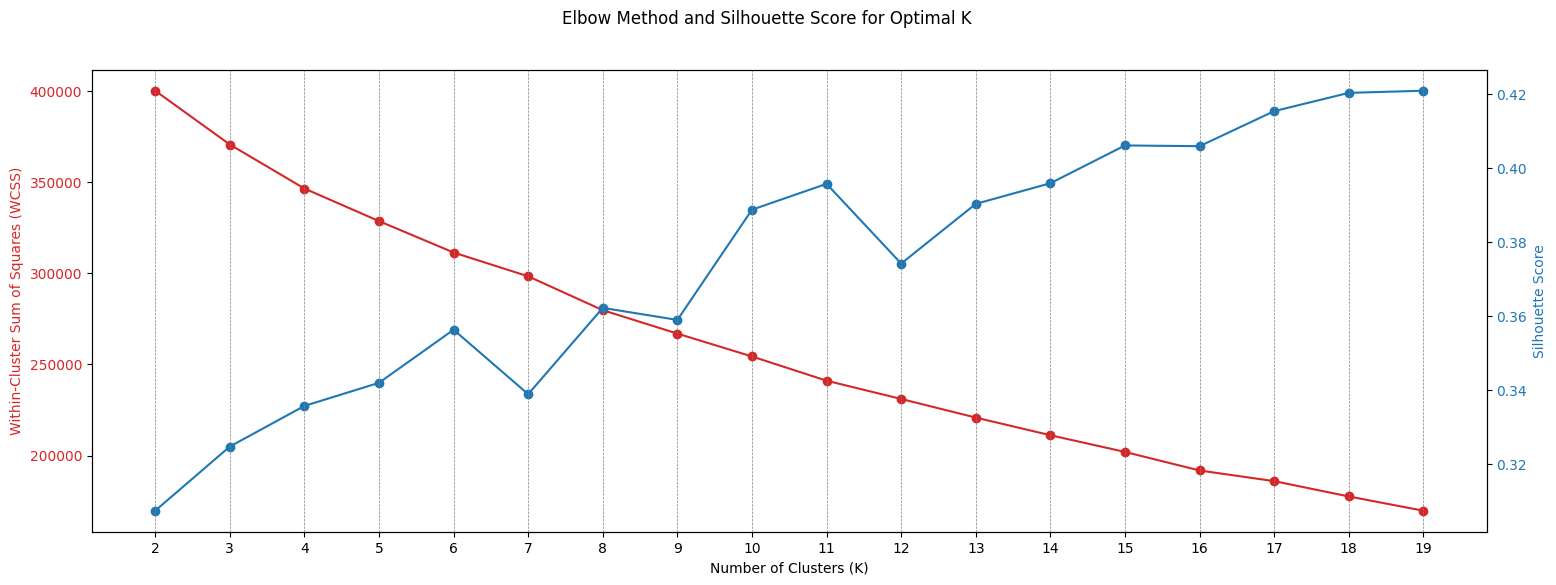

In [9]:
# Calculate the within-cluster sum of squares (WCSS) for different values of K
wcss = []
silhouette_scores = []

for k in range(2, K_MEANS_THRESHOLD):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(principal_components)
    wcss.append(kmeans.inertia_)
    
    if k > 1:
        silhouette_scores.append(silhouette_score(principal_components, cluster_labels))

# Plotting both Elbow Method and Silhouette Score
fig, ax1 = plt.subplots(figsize=(18, 6))

color = 'tab:red'
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)', color=color)
ax1.plot(range(2, K_MEANS_THRESHOLD), wcss, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(range(2, K_MEANS_THRESHOLD), silhouette_scores, marker='o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.xticks(range(2, K_MEANS_THRESHOLD))

for i, k in enumerate(range(2, K_MEANS_THRESHOLD)):
    plt.axvline(x=k, linestyle='--', color='gray', linewidth=0.5)

fig.suptitle('Elbow Method and Silhouette Score for Optimal K')
plt.show()


In [10]:
K = 18
model = KMeans(n_clusters=K, random_state=42)

# fitting data
model.fit(principal_components)

# predictions
cluster_labels_pca = model.predict(principal_components)

### Dataset analysis

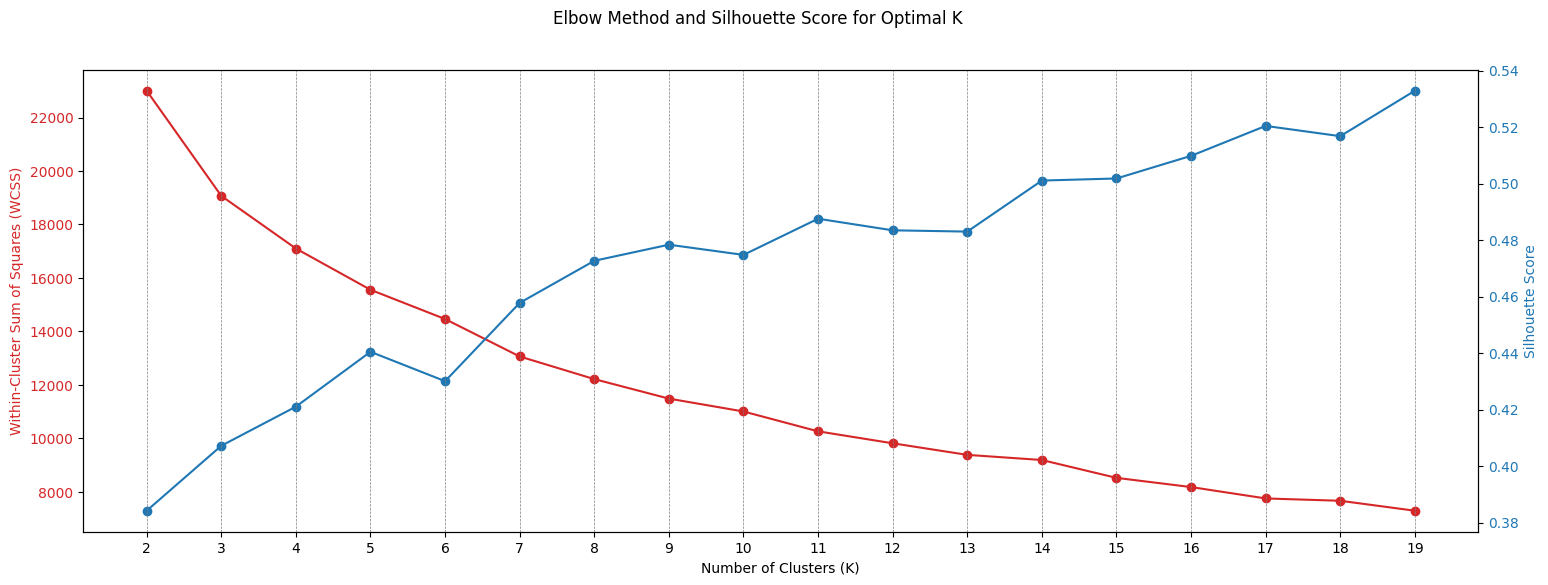

In [11]:
# Calculate the within-cluster sum of squares (WCSS) for different values of K
wcss = []
silhouette_scores = []

for k in range(2, K_MEANS_THRESHOLD):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(dd)
    wcss.append(kmeans.inertia_)
    
    if k > 1:
        silhouette_scores.append(silhouette_score(dd, cluster_labels))

# Plotting both Elbow Method and Silhouette Score
fig, ax1 = plt.subplots(figsize=(18, 6))

color = 'tab:red'
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)', color=color)
ax1.plot(range(2, K_MEANS_THRESHOLD), wcss, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(range(2, K_MEANS_THRESHOLD), silhouette_scores, marker='o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.xticks(range(2, K_MEANS_THRESHOLD))

for i, k in enumerate(range(2, K_MEANS_THRESHOLD)):
    plt.axvline(x=k, linestyle='--', color='gray', linewidth=0.5)

fig.suptitle('Elbow Method and Silhouette Score for Optimal K')
plt.show()

In [21]:
dd.head()

temperature  wild boar  porcupine       fox    badger    marten      wolf  \
0     0.738095   0.970339   0.011797  0.011498  0.001561  0.001526  0.001119   
1     0.523810   0.996969   0.002792  0.000111  0.000077  0.000033  0.000030   
2     0.357143   0.084600   0.352599  0.189490  0.206726  0.133163  0.003526   
3     0.500000   0.181714   0.263180  0.281831  0.010466  0.045829  0.012760   
4     0.595238   0.000117   0.000149  0.945735  0.000321  0.048991  0.008293   

       deer      hare  squirrel  ...  day_time_day  day_time_night  \
0  0.000951  0.000833  0.000314  ...           0.0             1.0   
1  0.000049  0.000013  0.000010  ...           0.0             1.0   
2  0.002619  0.005028  0.009804  ...           1.0             0.0   
3  0.020556  0.068491  0.004612  ...           1.0             0.0   
4  0.000033  0.000442  0.000409  ...           0.0             1.0   

   hunter_camera_1.0  hunter_camera_2.0  hunter_camera_3.0  hunter_camera_4.0  \
0                1.0                0.0                0.0                0.0   
1                1.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                1.0                0.0                0.0                0.0   

   hunter_camera_5.0  hunter_camera_6.0  hunter_camera_7.0  cluster  
0                0.0                0.0                0.0        1  
1                0.0                0.0                0.0        9  
2                0.0                1.0                0.0        3  
3                0.0                1.0                0.0        7  
4                0.0                0.0                0.0       10  

[5 rows x 30 columns]

In [12]:
K = 19
model = KMeans(n_clusters=K, random_state=42)

# fitting data
model.fit(dd)

# predictions
cluster_labels = model.predict(dd)

# adding the results to the df cluster
dd['cluster'] = cluster_labels

print(f'Silhoutte score: {silhouette_score(dd, cluster_labels)}')

0.7006145493312742


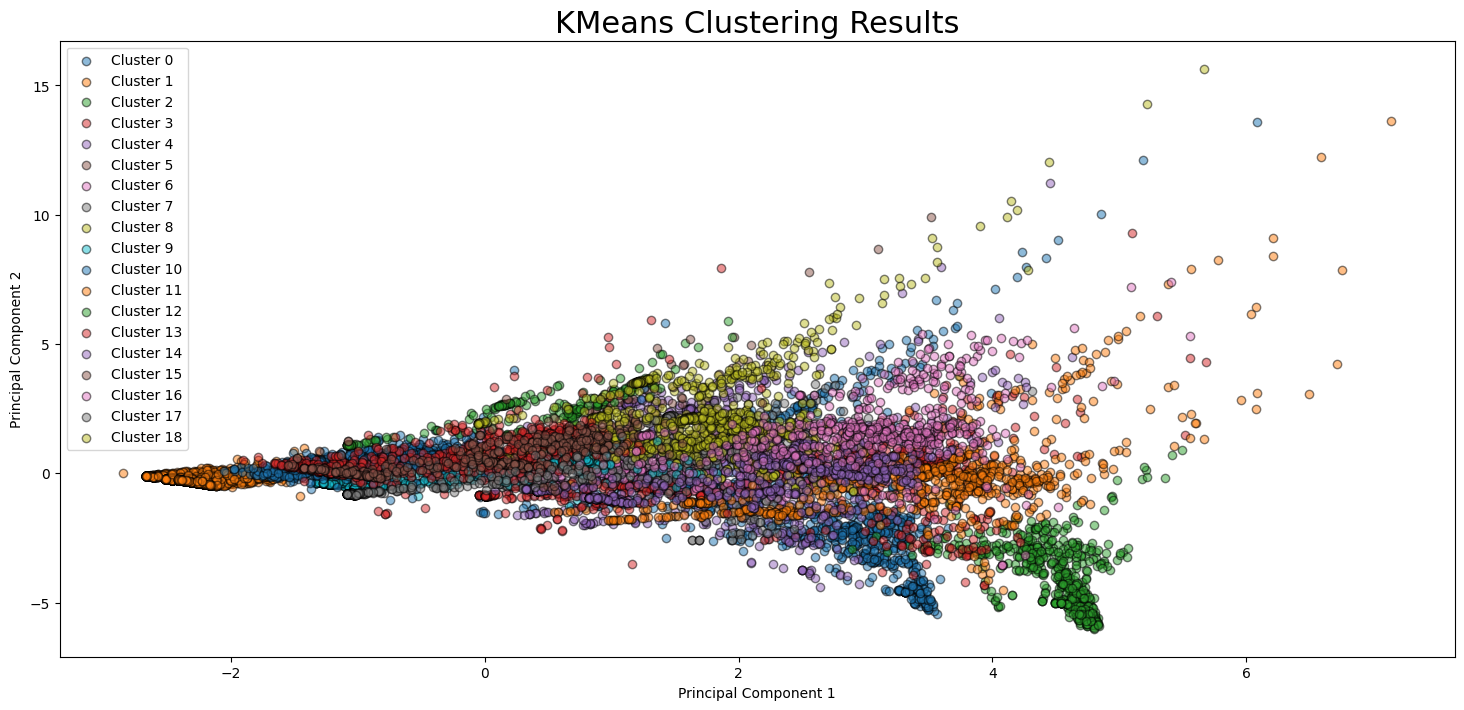

In [13]:
features = dd.drop(columns=['cluster'])

# Perform PCA to reduce dimensionality to 2 components
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_standardized)

# Add the 'cluster' column to the reduced DataFrame
reduced_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
reduced_df['cluster'] = cluster_labels

# Plotting the results
plt.figure(figsize=(18, 8))
for cluster in range(K):
    cluster_points = reduced_df[reduced_df['cluster'] == cluster]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], label=f'Cluster {cluster}', ec='black', alpha=0.5)

plt.title('KMeans Clustering Results', fontsize=22)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

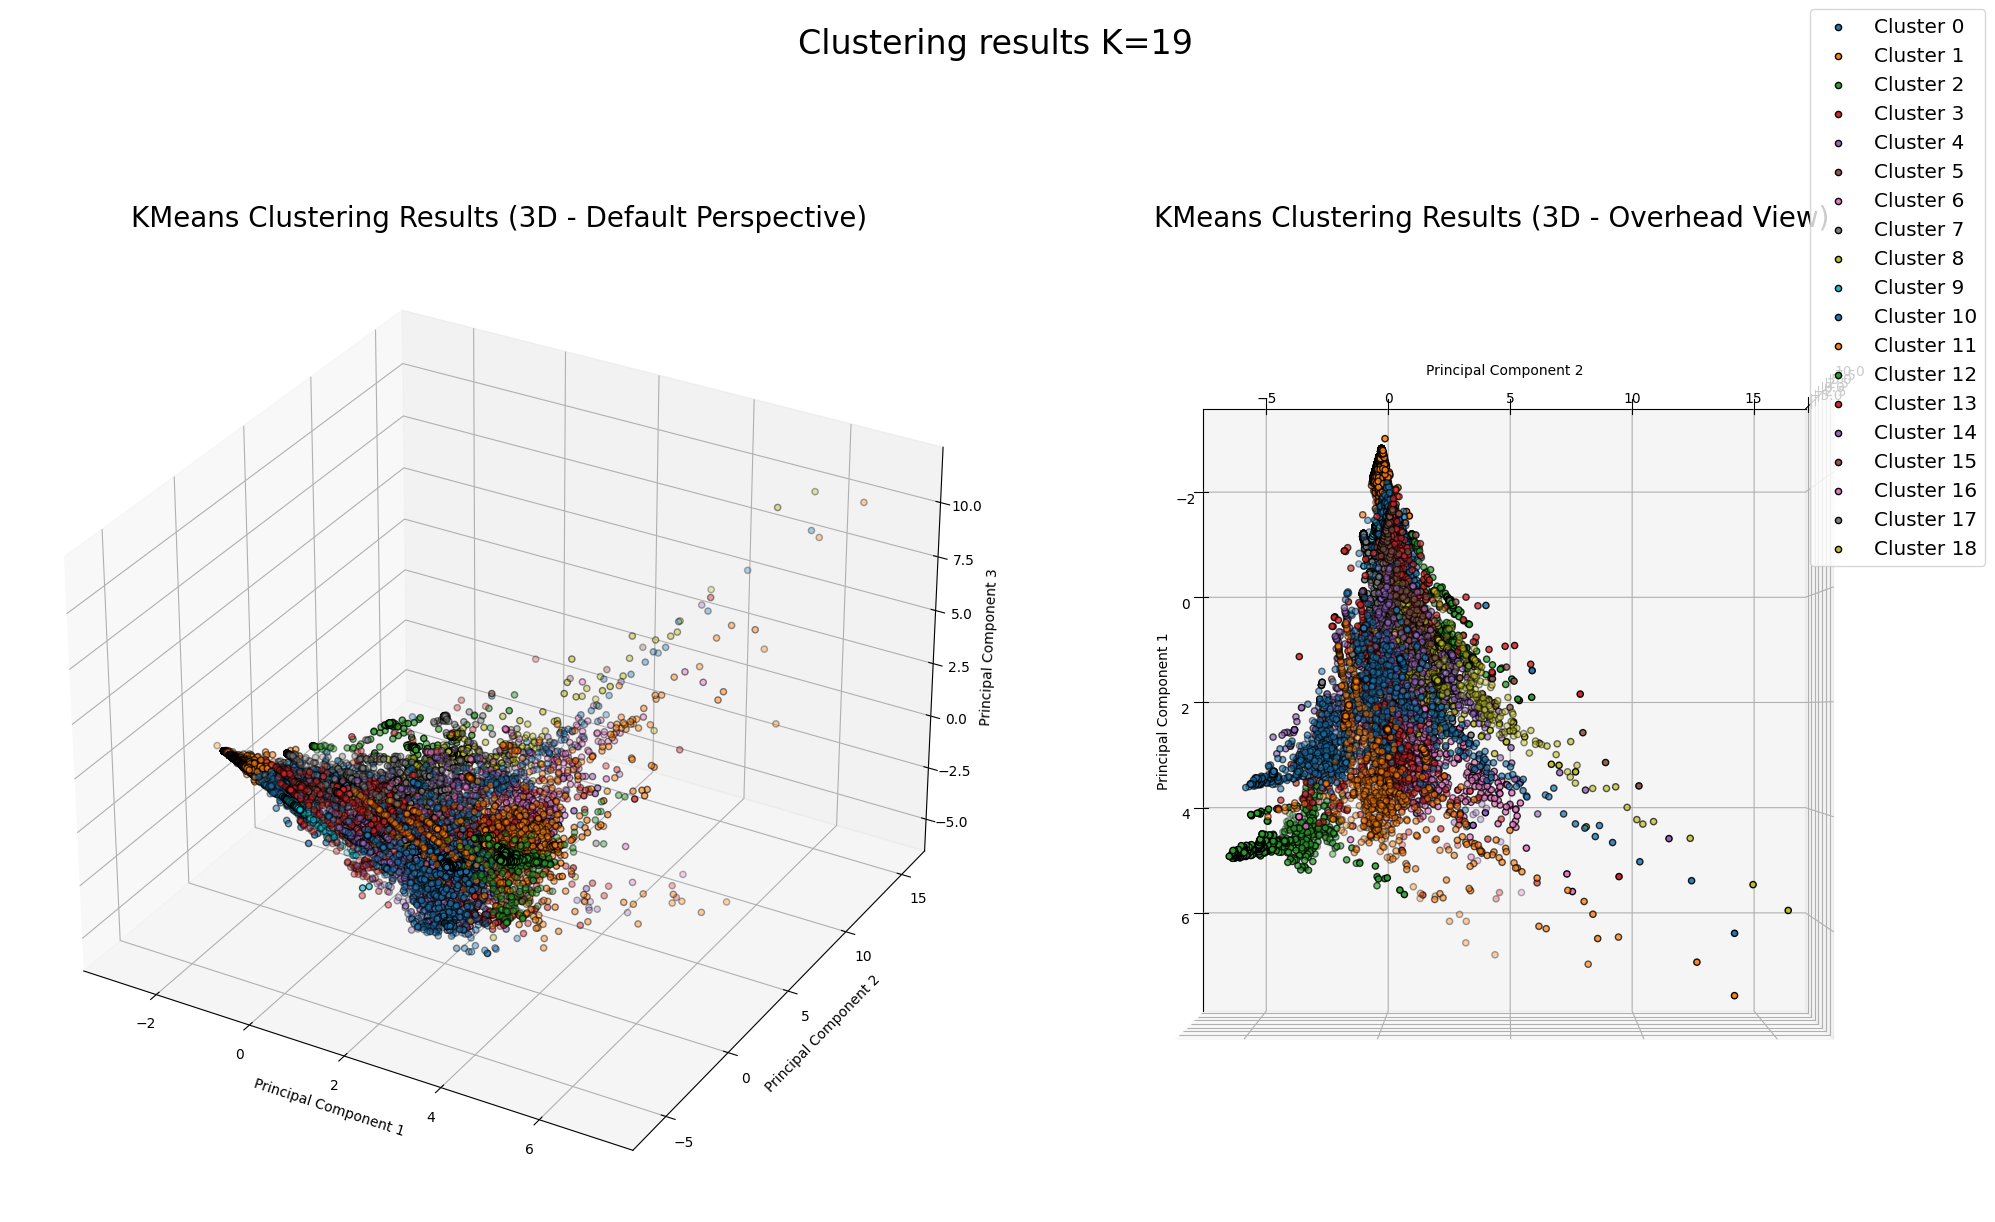

In [14]:
features = dd.drop(columns=['cluster'])

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Perform PCA to reduce dimensionality to 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(features_standardized)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, 4)])

# Add the 'cluster' column to the reduced DataFrame
pc_df['cluster'] = cluster_labels

# Plotting the results in 3D with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 14), subplot_kw={'projection': '3d'})

# Plot 1 - Default Perspective
ax1 = axes[0]
for cluster in range(K):
    cluster_points = pc_df[pc_df['cluster'] == cluster]
    ax1.scatter(cluster_points['PC1'], cluster_points['PC2'], cluster_points['PC3'], label=f'Cluster {cluster}', ec='black')

ax1.set_title('KMeans Clustering Results (3D - Default Perspective)', fontsize=20)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_zlabel('Principal Component 3')

# Plot 2 - Overhead Perspective
ax2 = axes[1]
for cluster in range(K):
    cluster_points = pc_df[pc_df['cluster'] == cluster]
    ax2.scatter(cluster_points['PC1'], cluster_points['PC2'], cluster_points['PC3'], label=f'Cluster {cluster}', ec='black')

ax2.set_title('KMeans Clustering Results (3D - Overhead View)', fontsize=20)
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
#ax2.set_zlabel('Principal Component 3')

# Set the view to an overhead perspective for the second plot
ax2.view_init(elev=90, azim=0)

# Increase the legend fontsize
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize='x-large')

fig.suptitle(f"Clustering results K={K}", fontsize=24)
plt.tight_layout()
plt.show()

### Centroids analysis

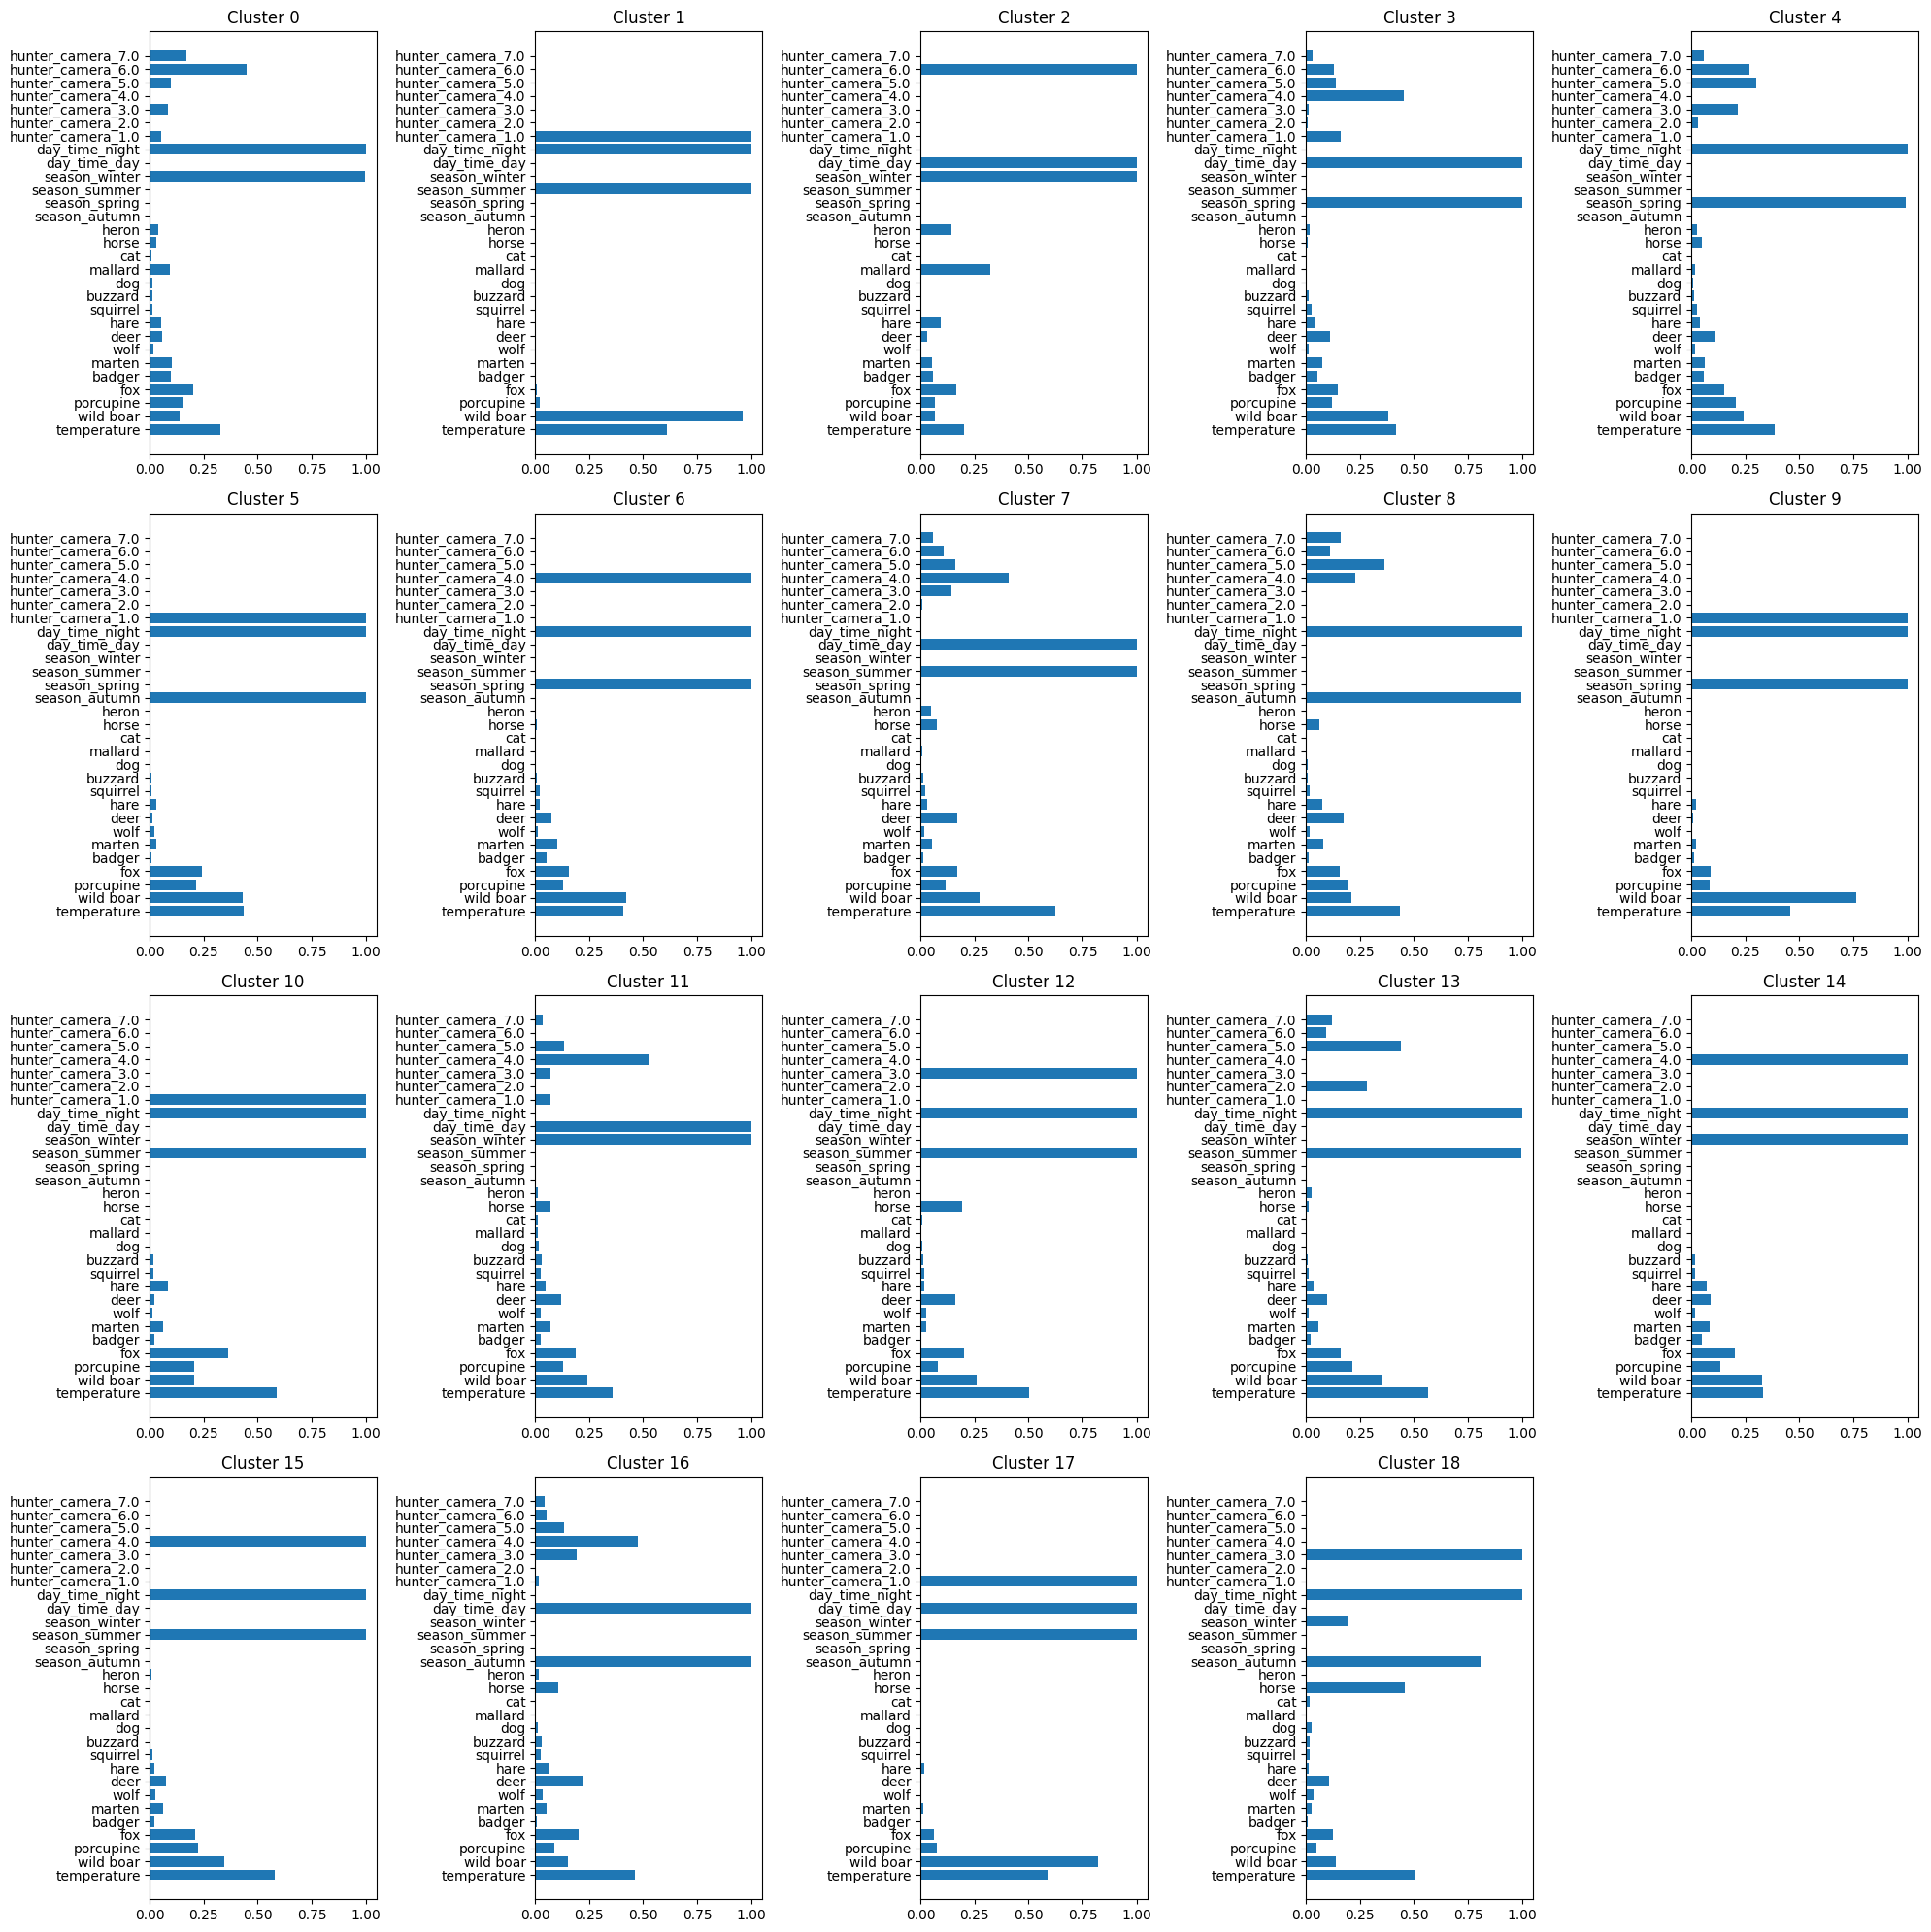

In [15]:
centroids = model.cluster_centers_

# Create a DataFrame with centroids and feature names
centroid_df = pd.DataFrame(data=centroids, columns=features.columns)

# Visualize feature importance
num_clusters = model.n_clusters
rows = 4
cols = int(np.ceil(num_clusters / rows))

plt.figure(figsize=(20, 20))
for i in range(num_clusters):
    plt.subplot(rows, cols, i + 1)
    plt.barh(features.columns, centroid_df.iloc[i, :])
    plt.title(f'Cluster {i}')
    plt.tight_layout()

plt.show()


### Conclusions

In [16]:
df = pd.read_csv(feed_dataset_dir + '/aculei.csv')

In [17]:
df['cluster'] = cluster_labels

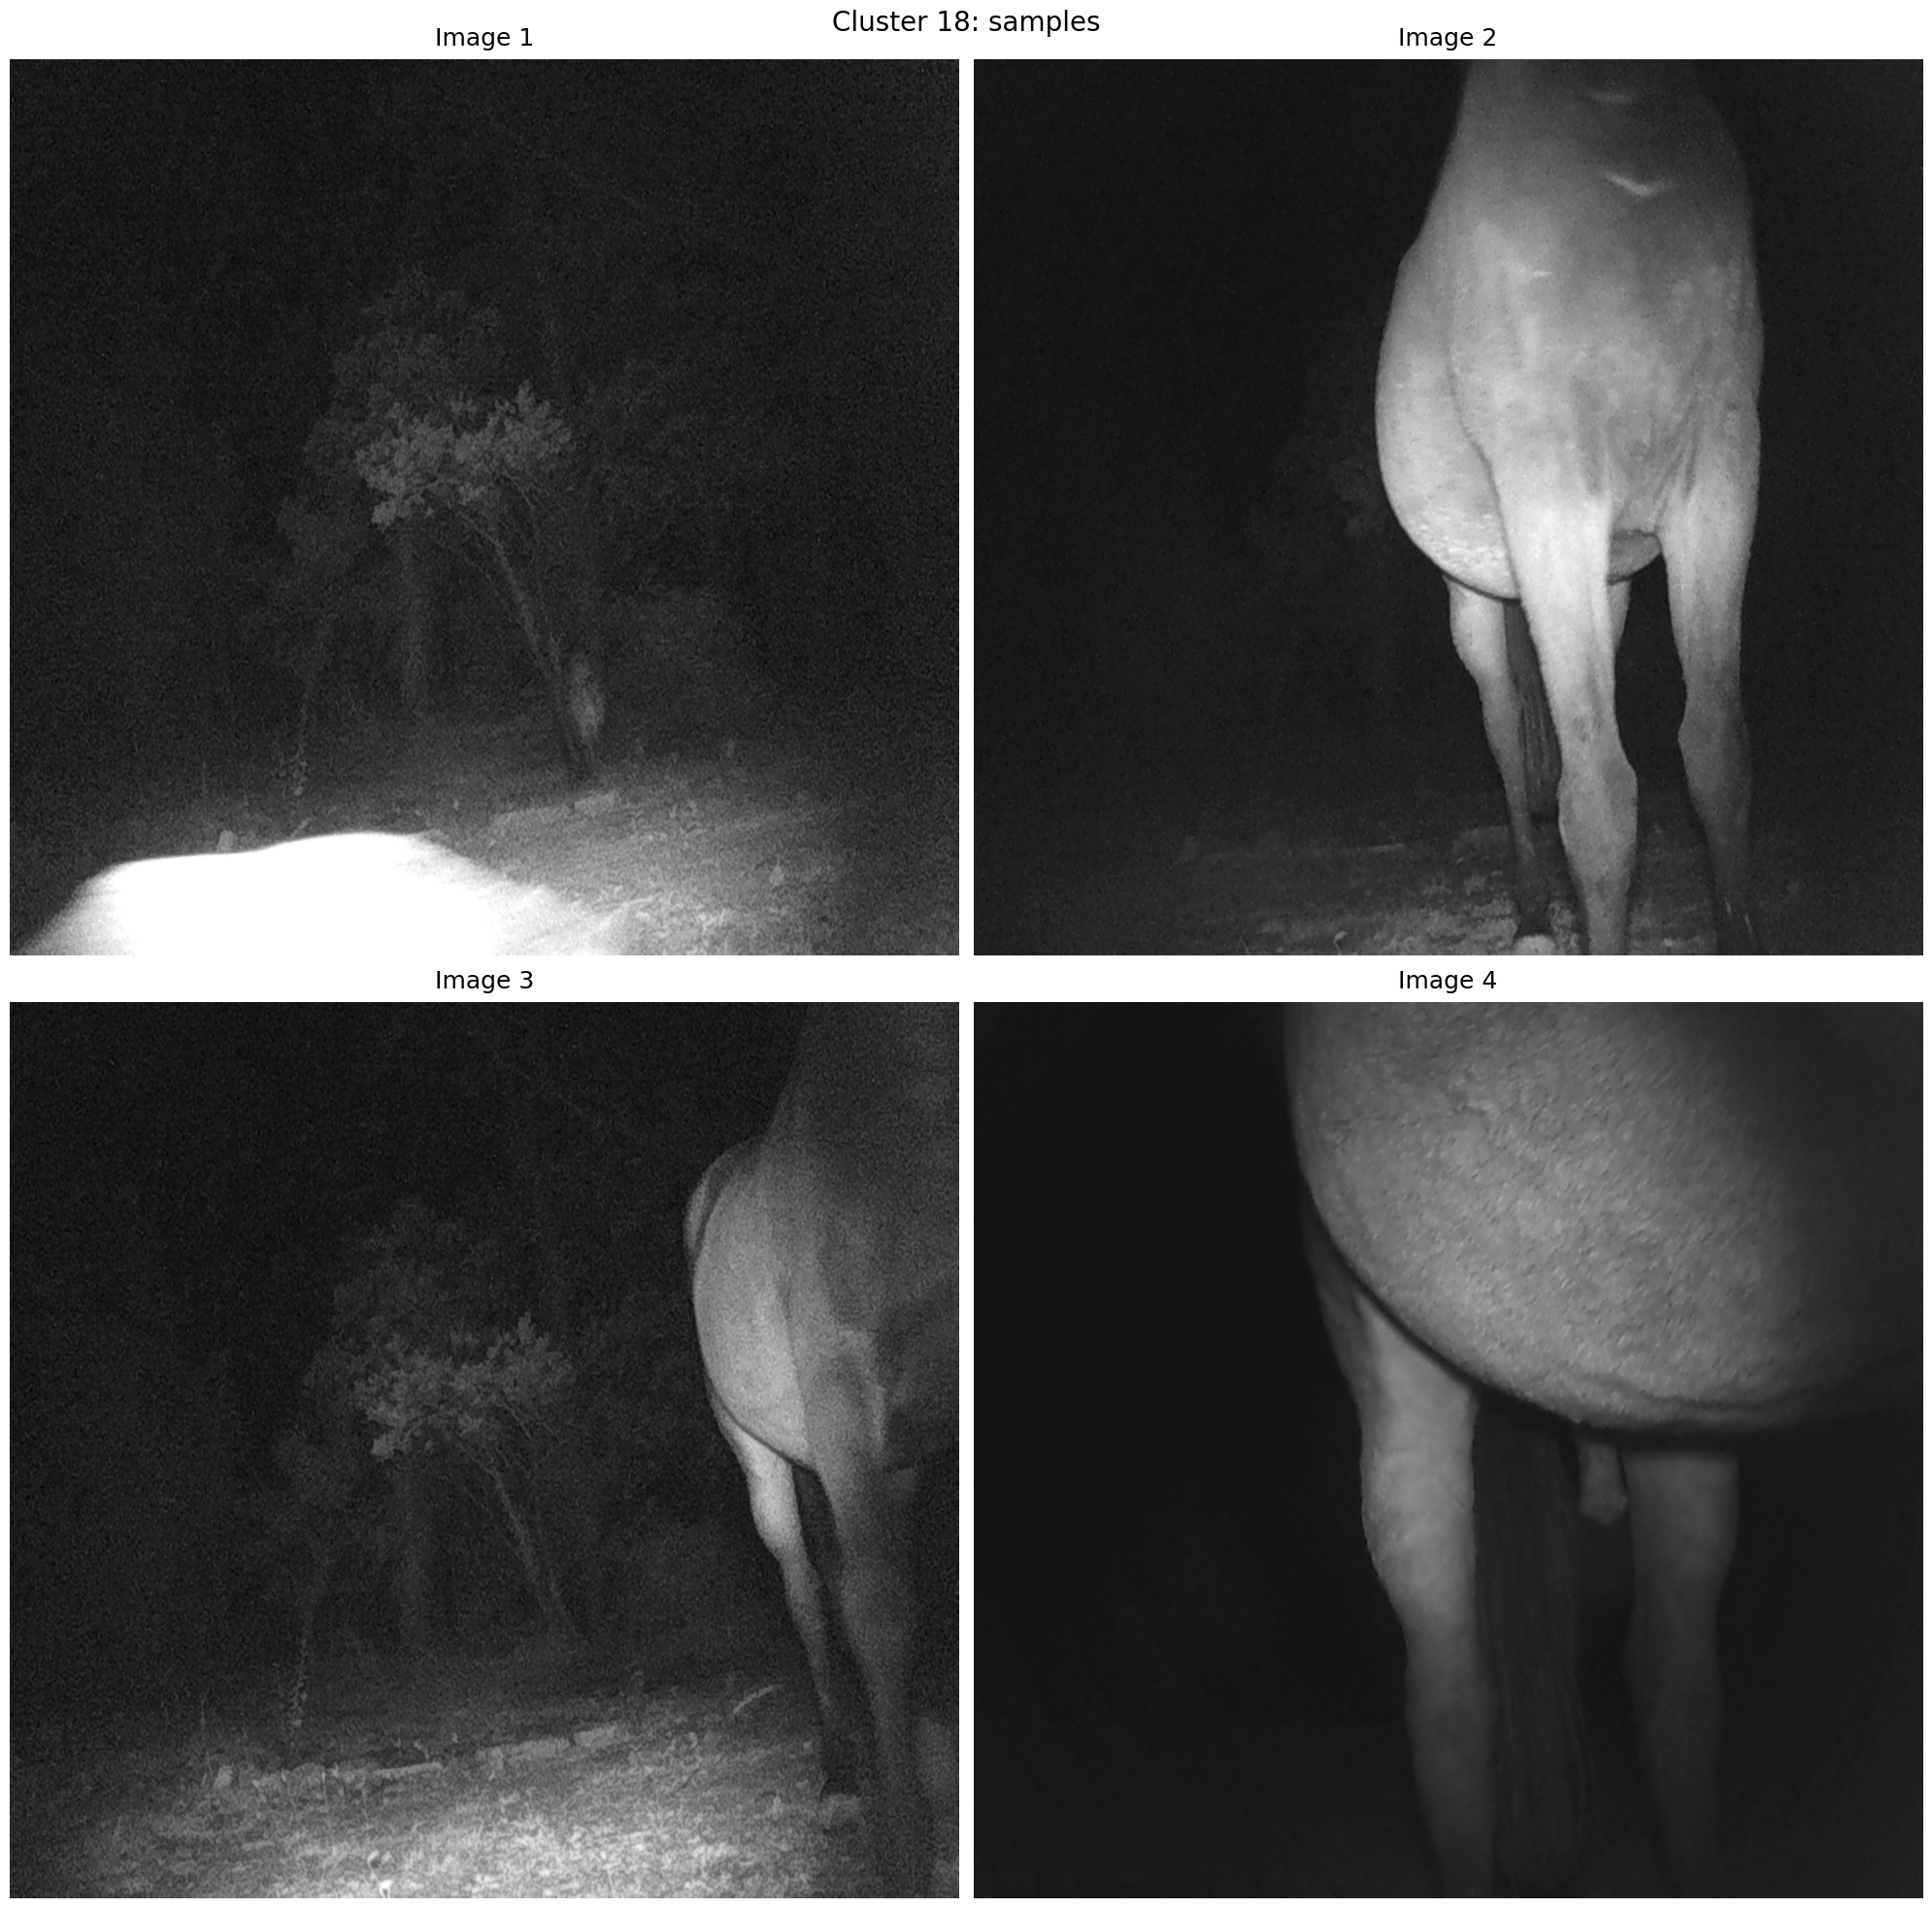

In [18]:
def plot_images_for_cluster(df, cluster, num_images=4):
    cluster_images = df[df['cluster'] == cluster]['image_name'].sample(num_images)

    fig, axes = plt.subplots(2, 2, figsize=(20, 20))

    for i, ax in enumerate(axes.flatten()):
        if i < num_images:
            image_name = cluster_images.iloc[i]
            image_path = os.path.join(images_dir, image_name)
            image = Image.open(image_path)

            ax.imshow(image, aspect='auto')
            ax.axis('off')
            ax.set_title(f"Image {i + 1}", fontsize=18, pad=10)

    fig.suptitle(f"Cluster {cluster}: samples", fontsize=20)
    plt.tight_layout()
    plt.show()

plot_images_for_cluster(df, cluster=18, num_images=4)